In [247]:
import pandas as pd
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pickle
from glob import glob

df = pd.read_csv("data.csv")
df = df.dropna()

usecols = ["ID", "gender", "age", "gender_diff", "age_diff"]
df = df[usecols]
df["age"] = df["age"].astype(int).astype(str)
df["path"] = "input/data/train/images/" + df["ID"] + "_" + df["gender"] + "_Asian_"+ df["age"]

gender_to_change = []
age_to_change = []

change_gender = df[df["gender_diff"] == "false"]
change_age = df[df["age_diff"] == "false"]

In [248]:
change_gender.reset_index(inplace = True, drop = True)
change_age.reset_index(inplace = True, drop = True)

In [249]:
def image_gender_check(start_idx, img_id, gender, path):
    pic_path = glob(os.path.join(path, "normal.*"))[0]
    img = Image.open(pic_path)
    plt.imshow(img)
    plt.show()
    new_gender = "female" if gender == "male" else "male"
    
    while True:
        enter_key = input(f"Original Label: {gender}. ID:{img_id}. You think it's correct? [y -yes/ n-no / p-pause / q- quit]")
        if enter_key.lower() == "y":
            print("Mark as correct")
            return "y"
        elif enter_key.lower() == "n":
            print(f"Mark as incorrect : {gender} -> {new_gender} ")
            return "n"

        elif enter_key.lower() == "p":
            print("Mark as stop. Confusing?")
            return "p"
        
        elif enter_key.lower() == "q":
            print("You choose to stop. Temporary")
            return "q"
        else:
            print("Wrong input. [y|n|p|q] is valid. Press again")
    
def check_image_gender(dataframe,  start_idx=0, end_idx=1000):
    pause_lists = []
    false_lists = []
    count = 0
    try:
        for idx, row in dataframe.iterrows():
            if idx>end_idx  : continue
            pass
            print("idx:", idx)
            count+=1   
            img_id = row["ID"]
            gender = row["gender"]
            age = row["age"]
            path = row["path"]

            new_gender = "male" if gender == "female" else "female"
            check_key = image_gender_check(idx, img_id, gender, path)
            
            print(f"{count}번쨰")
            
            if check_key == "n":
                false_lists.append((img_id, new_gender))    

            elif check_key == "p":
                pause_lists.append((img_id, new_gender))

            elif check_key == "q":
                print("STOP AT idx:", idx)
                print("Record the result somewhere else, if you are not done")
                break
                
            else:
                print("NOTHING SPECIAL")
    
            clear_output(wait=True)
        
    except KeyboardInterrupt:
        print("Interrupt catch")
        return pause_lists, false_lists, count
        
    return pause_lists, false_lists, count

In [275]:
def image_age_check(start_idx, img_id, age, path):
    pic_path = glob(os.path.join(path, "normal.*"))[0]
    img = Image.open(pic_path)
    plt.imshow(img)
    plt.show()
    
    while True:
        enter_key = input(f"Original Label: {int(age)//30},{30 * (int(age)//30)} ~ {30 *(int(age)//30+1)} , with age {age}.ID:{img_id}. You think it's correct? [y -yes/ n-no / p-pause / q- quit]")
        if enter_key.lower() == "y":
            print("Correct!")
            return "y", age
        elif enter_key.lower() == "n":
            print("Wrong label. save your predictions..")
            
            while True:
                new_label = input("Your new label ?? Choose from 0,1,2")
                if new_label not in ["0", "1", "2"] :
                    print("다시 입력하세요")
                    continue
                new_label = int(new_label)
                break
                
            return "n", new_label

        elif enter_key.lower() == "p":
            print("You choose to pause. Discuss with others.")
            return "p", age
        
        elif enter_key.lower() == "q":
            print("You choose to stop. Temporary")
            print("Record the result somewhere else, if you are not done")
            return "q", age
        else:
            print("Wrong input. [y|n|p|q] is valid. Press again")
    

def check_image_age(dataframe, start_idx=0, end_idx=1000):
    try:
        pause_lists = []
        false_lists = []
        count = 0
        for idx, row in dataframe.iterrows():
            print("idx:", idx)
            count += 1
            if idx< start_idx or idx>end_idx : continue        
            img_id = row["ID"]
            gender = row["gender"]
            age = row["age"]
            path = row["path"]

            new_gender = "male" if gender == "female" else "female"
            print(f"{count}번쨰")
            check_key, new_age = image_age_check(idx, img_id, age, path)
            if check_key == "n":
                false_lists.append((img_id, new_age))    

            elif check_key == "p":
                pause_lists.append((img_id, age))    

            elif check_key == "q":
                print("STOP AT idx:", idx)
                print("Record the result somewhere else, if you are not done")
                break        
                
            else:
                print("NOTHING SPECIAL")
    
            clear_output(wait=True)
            
    except KeyboardInterrupt:
        print("Interrupt catch")
        return pause_lists, false_lists, count
            
    return pause_lists, false_lists, count

In [219]:
# 대략 100, 180 정도로 잡았습니다.

### 본인 것만 사용하고 나머지 주석 달기!y

- [x] 주석 꼭 다세요

In [220]:
#상모
GENDER_START , GENDER_END = 0, 100
AGE_START, AGE_END = 0, 190


# #규보
# GENDER_START , GENDER_END = 101, 200
# AGE_START, AGE_END = 191, 380


# #서현
# GENDER_START , GENDER_END = 201, 300
# AGE_START, AGE_END = 381, 570



# #한별
# GENDER_START , GENDER_END = 301, 400
# AGE_START, AGE_END = 571, 760


# #영진
# GENDER_START , GENDER_END = 401, 500
# AGE_START, AGE_END = 761, 950

### Gender

idx: 100


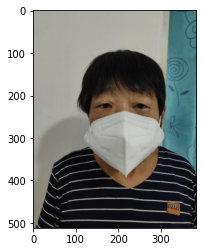

Original Label: female. ID:000719. You think it's correct? [y -yes/ n-no / p-pause / q- quit]y
Mark as correct
101번쨰
NOTHING SPECIAL


In [221]:
pause_gender_lists, false_gender_lists, stop_gender_idx =  check_image_gender(change_gender,  start_idx = GENDER_START, end_idx = GENDER_END)

In [222]:
p1, f1, start_again = pause_gender_lists, false_gender_lists, stop_gender_idx

In [223]:
p1

[('000214', 'male'),
 ('000278', 'male'),
 ('000283', 'male'),
 ('000292', 'male'),
 ('000293', 'male'),
 ('000311', 'male'),
 ('000344', 'male'),
 ('000357', 'male'),
 ('000514', 'male'),
 ('000528', 'male'),
 ('000535', 'male'),
 ('000668', 'male'),
 ('000718', 'male')]

In [224]:
f1

[('000010', 'male'),
 ('000219', 'male'),
 ('000226', 'male'),
 ('000272', 'male'),
 ('000273', 'male'),
 ('000279', 'male'),
 ('000299', 'male'),
 ('000667', 'male')]

In [190]:
start_again

100

In [182]:
stop_gender_idx

2672

In [181]:
pause_gender_lists

[('000010', 'male'), ('000210', 'male'), ('000272', 'male')]

### Age

###   0 : 30살 미만 
###   1 :  30살 ~ 60살
###   2 :  60살~  (60살 넘어가는 사람 : 걍 60살로 찌부한것같음)

In [276]:
pause_age_lists, false_age_lists, stop_age_idx = check_image_age(change_age,  start_idx = AGE_START, end_idx = AGE_END)

idx: 191
idx: 192
idx: 193
idx: 194
idx: 195
idx: 196
idx: 197
idx: 198
idx: 199
idx: 200
idx: 201
idx: 202
idx: 203
idx: 204
idx: 205
idx: 206
idx: 207
idx: 208
idx: 209
idx: 210
idx: 211
idx: 212
idx: 213
idx: 214
idx: 215
idx: 216
idx: 217
idx: 218
idx: 219
idx: 220
idx: 221
idx: 222
idx: 223
idx: 224
idx: 225
idx: 226
idx: 227
idx: 228
idx: 229
idx: 230
idx: 231
idx: 232
idx: 233
idx: 234
idx: 235
idx: 236
idx: 237
idx: 238
idx: 239
idx: 240
idx: 241
idx: 242
idx: 243
idx: 244
idx: 245
idx: 246
idx: 247
idx: 248
idx: 249
idx: 250
idx: 251
idx: 252
idx: 253
idx: 254
idx: 255
idx: 256
idx: 257
idx: 258
idx: 259
idx: 260
idx: 261
idx: 262
idx: 263
idx: 264
idx: 265
idx: 266
idx: 267
idx: 268
idx: 269
idx: 270
idx: 271
idx: 272
idx: 273
idx: 274
idx: 275
idx: 276
idx: 277
idx: 278
idx: 279
idx: 280
idx: 281
idx: 282
idx: 283
idx: 284
idx: 285
idx: 286
idx: 287
idx: 288
idx: 289
idx: 290
idx: 291
idx: 292
idx: 293
idx: 294
idx: 295
idx: 296
idx: 297
idx: 298
idx: 299
idx: 300
idx: 301
i

In [277]:
result_dict = dict(
    pause_gender = pause_gender_lists,
    false_gender = false_gender_lists,
    pause_age = pause_age_lists,
    false_age = false_age_lists,
    stop_gender = stop_gender_idx,
    stop_age = stop_age_idx
)

In [278]:
with open(file='mislabel.pickle', mode='wb') as f:
    pickle.dump(result_dict, f)